In [1]:
import tsplib95
import numpy as np
import random
import tsplib95
from typing import List
from numpy.random import default_rng
from itertools import chain
from genetic_algorithm import GeneticAlgorithm
import matplotlib.pyplot as plt
import pandas as pd


Define help function

In [68]:

#Generate a list of unique random parameter sets for the TSP problem solved with a genetic algorithm.
#Optimal values for mutation and crossover have a higher chance of being selected.
def generate_unique_random_tsp_parameters(num_cities, num_sets):

    # Determine population size based on the number of cities


    if num_cities > 10:
        population_size = 200
    elif num_cities > 5:
        population_size = 30
    else:
        population_size = 6


    # Parameters ranges
    num_generations = 2000
    elitism_rate = 0.15  # 15%
    # Optimal values have a higher probability
    mutation_rates = [0, 0.05, 0.1, 0.15, 0.2, 0.5, 0.8]
    mutation_rate_probs = [0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]

    crossover_rates = [0, 0.2, 0.5, 0.6, 0.7,0.8,0.9,1] # here is a higher chance to be selected
    selection_methods = [0, 1,2,3,4]  # Roulette, Rank Selection
    crossover_methods = [0, 1, 2, 3]  # One-point, Two-point, Order, Cyclic
    mutation_methods = [0, 1, 2, 3]  # Tower, Inversion, Rotation, Thor's

    parameter_sets = set()

    while len(parameter_sets) < num_sets:
        parameters = (
            population_size,
            num_generations,
            np.random.choice(mutation_rates,p=mutation_rate_probs),
            elitism_rate,
            np.random.choice(selection_methods),
            np.random.choice(crossover_methods),
            np.random.choice(mutation_methods)
        )
        parameter_sets.add(parameters)

    # Convert to list of dicts
    return [{"population_size": p[0], "num_generations": p[1], "mutation_rate": p[2],
             "elitism_rate": p[3], "selection_method": p[4],
             "crossover_method": p[5], "mutation_method": p[6]} for p in parameter_sets]

# Example usage to generate 5 unique random parameter sets for a problem with 12 cities
unique_random_parameters = generate_unique_random_tsp_parameters(12, 5)
unique_random_parameters



[{'population_size': 200,
  'num_generations': 2000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'selection_method': 0,
  'crossover_method': 1,
  'mutation_method': 2},
 {'population_size': 200,
  'num_generations': 2000,
  'mutation_rate': 0.8,
  'elitism_rate': 0.15,
  'selection_method': 1,
  'crossover_method': 3,
  'mutation_method': 2},
 {'population_size': 200,
  'num_generations': 2000,
  'mutation_rate': 0.05,
  'elitism_rate': 0.15,
  'selection_method': 2,
  'crossover_method': 2,
  'mutation_method': 0},
 {'population_size': 200,
  'num_generations': 2000,
  'mutation_rate': 0.5,
  'elitism_rate': 0.15,
  'selection_method': 0,
  'crossover_method': 3,
  'mutation_method': 1},
 {'population_size': 200,
  'num_generations': 2000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'selection_method': 3,
  'crossover_method': 3,
  'mutation_method': 0}]

In [109]:
# isntad of taking different parameter settings for each problem, we will define parameter settings infront and than use them for every dataset
# this has the advantage that we see the different parameters settings

parameters = [
  {'population_size': 5,
  'num_generations': 3000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'selection_method': 0,
  'crossover_method': 0,
  'mutation_method': 0},
   {'population_size': 50,
  'num_generations': 3000,
  'mutation_rate': 1,
  'elitism_rate': 0.15,
  'selection_method': 0,
  'crossover_method': 1,
  'mutation_method': 1},
  {'population_size': 100,
  'num_generations': 3000,
  'mutation_rate': 0.5,
  'elitism_rate': 0.15,
  'selection_method': 1,
  'crossover_method': 1,
  'mutation_method': 1},
  {'population_size': 150,
  'num_generations': 3000,
  'mutation_rate': 0.2,
  'elitism_rate': 0.15,
  'selection_method': 2,
  'crossover_method': 2,
  'mutation_method': 2},
  {'population_size': 200,
  'num_generations': 3000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'selection_method': 3,
  'crossover_method': 3,
  'mutation_method': 3},
  {'population_size': 200,
  'num_generations': 3000,
  'mutation_rate': 0.8,
  'elitism_rate': 0.15,
  'selection_method': 3,
  'crossover_method': 3,
  'mutation_method': 3},
  {'population_size': 200,
  'num_generations': 3000,
  'mutation_rate': 0.05,
  'elitism_rate': 0.15,
  'selection_method': 4,
  'crossover_method': 1,
  'mutation_method': 3},
  {'population_size': 400,
  'num_generations': 3000,
  'mutation_rate': 0.0,
  'elitism_rate': 0.15,
  'selection_method': 2,
  'crossover_method': 3,
  'mutation_method': 1},
  {'population_size': 400,
  'num_generations': 3000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'selection_method': 0,
  'crossover_method': 3,
  'mutation_method': 3},
  {'population_size': 200,
  'num_generations': 3000,
  'mutation_rate': 0.05,
  'elitism_rate': 0.15,
  'selection_method': 2,
  'crossover_method': 2,
  'mutation_method': 2},
  {'population_size': 400,
  'num_generations': 3000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'selection_method': 1,
  'crossover_method': 0,
  'mutation_method': 0}
]


In [110]:
parameters_df = pd.DataFrame(parameters)
parameters_df.head(20)

,population_size,num_generations,mutation_rate,elitism_rate,selection_method,crossover_method,mutation_method
0,5,3000,0.15,0.15,0,0,0
1,50,3000,1.00,0.15,0,1,1
2,100,3000,0.50,0.15,1,1,1
3,150,3000,0.20,0.15,2,2,2
4,200,3000,0.15,0.15,3,3,3
5,200,3000,0.80,0.15,3,3,3
6,200,3000,0.05,0.15,4,1,3
7,400,3000,0.00,0.15,2,3,1
8,400,3000,0.15,0.15,0,3,3
9,200,3000,0.05,0.15,2,2,2


In [95]:
print(parameters_df.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & population_size & num_generations & mutation_rate & elitism_rate & selection_method & crossover_method & mutation_method \\
\midrule
0 & 5 & 3000 & 0.150000 & 0.150000 & 0 & 0 & 0 \\
1 & 200 & 3000 & 1.000000 & 0.150000 & 0 & 1 & 1 \\
2 & 100 & 3000 & 0.500000 & 0.150000 & 1 & 1 & 1 \\
3 & 150 & 3000 & 0.200000 & 0.150000 & 2 & 2 & 2 \\
4 & 200 & 3000 & 0.150000 & 0.150000 & 3 & 3 & 3 \\
5 & 200 & 3000 & 0.800000 & 0.150000 & 3 & 3 & 3 \\
6 & 200 & 3000 & 0.050000 & 0.150000 & 4 & 1 & 3 \\
7 & 400 & 3000 & 0.000000 & 0.150000 & 2 & 3 & 1 \\
8 & 400 & 3000 & 0.150000 & 0.150000 & 0 & 3 & 3 \\
9 & 200 & 3000 & 0.050000 & 0.150000 & 2 & 2 & 2 \\
10 & 400 & 3000 & 0.150000 & 0.150000 & 1 & 0 & 0 \\
\bottomrule
\end{tabular}



In [113]:
def run_genetic_algorithm_for_different_parameteres(problem, parameters):
   
   # for each parameter set we run the function 10 times, and take take the worst cost, average and best cost
    evolution_of_minimum = []
    best_tour_length = float("inf")
    results = []
    counter = 0
    position_of_best = float("inf")
    for param in parameters:
        counter = counter +1
        print(param)
        tour_minimas = []
        generation_numbers = []
        for i in range(6):

          gen = GeneticAlgorithm(problem,
                               population_size=param["population_size"],
                               elitism=param["elitism_rate"],
                               mutation_rate=param["mutation_rate"],
                               selection_method=param["selection_method"],
                               crossover_method=param["crossover_method"],
                               mutation_method=param["mutation_method"])

          gen.use_genetic_algorithm(param["num_generations"])
          ev = gen.evolution_of_minimum()
          # append only the generation number till the minimuum firs occurs
          generation_numbers.append(ev.index(min(ev))+1)
          tour_minimas.append(min(ev))
          
          if tour_minimas[-1] < best_tour_length:
            best_tour_length = tour_minimas[-1]
            evolution_of_minimum = ev[:ev.index(min(ev))+1]
            position_of_best = counter

        praram_result = {}
        praram_result["best cost"] = np.min(tour_minimas)
        praram_result["average cost"] = np.mean(tour_minimas)
        praram_result["worst cost"] = np.max(tour_minimas)
        praram_result["best gen"] = np.min(generation_numbers)
        praram_result["average gen"] = np.mean(generation_numbers)
        praram_result["worst gen"] = np.max(generation_numbers)
        results.append(praram_result)



    print(position_of_best)
    plt.plot(list(range(1, len(evolution_of_minimum) + 1)), evolution_of_minimum)
    print(evolution_of_minimum)

   
    return results
   # calc average, wrost and best
   #TODO: continue here
   #average = average(tour_minimas)


In [89]:
# function to search for the last change in an evolution array
a = [30,22,21,19,19,19,19]
print(a.index(19))
print()

3



# For date set five

In [115]:
# function to ouput
five = tsplib95.load('datasets/five.tsp')

{'population_size': 5, 'num_generations': 3000, 'mutation_rate': 0.15, 'elitism_rate': 0.15, 'selection_method': 0, 'crossover_method': 0, 'mutation_method': 0}
{'population_size': 50, 'num_generations': 3000, 'mutation_rate': 1, 'elitism_rate': 0.15, 'selection_method': 0, 'crossover_method': 1, 'mutation_method': 1}
{'population_size': 100, 'num_generations': 3000, 'mutation_rate': 0.5, 'elitism_rate': 0.15, 'selection_method': 1, 'crossover_method': 1, 'mutation_method': 1}
{'population_size': 150, 'num_generations': 3000, 'mutation_rate': 0.2, 'elitism_rate': 0.15, 'selection_method': 2, 'crossover_method': 2, 'mutation_method': 2}
{'population_size': 200, 'num_generations': 3000, 'mutation_rate': 0.15, 'elitism_rate': 0.15, 'selection_method': 3, 'crossover_method': 3, 'mutation_method': 3}
{'population_size': 200, 'num_generations': 3000, 'mutation_rate': 0.8, 'elitism_rate': 0.15, 'selection_method': 3, 'crossover_method': 3, 'mutation_method': 3}
{'population_size': 200, 'num_g

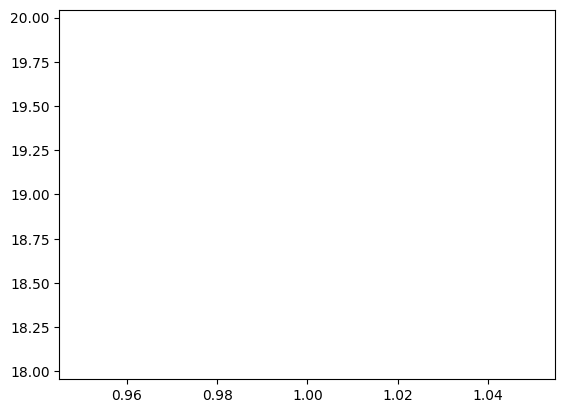

In [116]:
# the parameters look good
results = run_genetic_algorithm_for_different_parameteres(five,parameters)

df = pd.DataFrame(results)


In [123]:
df.head(11)

,best cost,average cost,worst cost,best gen,average gen,worst gen
0,361,438.000000,531,25,80.666667,137
1,291,302.166667,328,51,76.000000,135
2,291,291.000000,291,22,54.666667,98
3,291,291.000000,291,24,39.500000,75
4,323,348.000000,388,21,69.500000,107
5,295,320.833333,348,62,107.166667,238
6,291,302.666667,327,39,67.000000,88
7,350,383.333333,415,1,12.166667,22
8,311,325.333333,337,21,40.166667,64
9,291,291.000000,291,24,36.166667,76


In [124]:
df.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & best cost & average cost & worst cost & best gen & average gen & worst gen \\\\\n\\midrule\n0 & 361 & 438.000000 & 531 & 25 & 80.666667 & 137 \\\\\n1 & 291 & 302.166667 & 328 & 51 & 76.000000 & 135 \\\\\n2 & 291 & 291.000000 & 291 & 22 & 54.666667 & 98 \\\\\n3 & 291 & 291.000000 & 291 & 24 & 39.500000 & 75 \\\\\n4 & 323 & 348.000000 & 388 & 21 & 69.500000 & 107 \\\\\n5 & 295 & 320.833333 & 348 & 62 & 107.166667 & 238 \\\\\n6 & 291 & 302.666667 & 327 & 39 & 67.000000 & 88 \\\\\n7 & 350 & 383.333333 & 415 & 1 & 12.166667 & 22 \\\\\n8 & 311 & 325.333333 & 337 & 21 & 40.166667 & 64 \\\\\n9 & 291 & 291.000000 & 291 & 24 & 36.166667 & 76 \\\\\n10 & 291 & 298.666667 & 321 & 19 & 30.333333 & 60 \\\\\n\\bottomrule\n\\end{tabular}\n'

# For Problem P01

In [125]:
p01 = tsplib95.load('datasets/p01.tsp.txt')

{'population_size': 5, 'num_generations': 3000, 'mutation_rate': 0.15, 'elitism_rate': 0.15, 'selection_method': 0, 'crossover_method': 0, 'mutation_method': 0}
{'population_size': 50, 'num_generations': 3000, 'mutation_rate': 1, 'elitism_rate': 0.15, 'selection_method': 0, 'crossover_method': 1, 'mutation_method': 1}
{'population_size': 100, 'num_generations': 3000, 'mutation_rate': 0.5, 'elitism_rate': 0.15, 'selection_method': 1, 'crossover_method': 1, 'mutation_method': 1}
{'population_size': 150, 'num_generations': 3000, 'mutation_rate': 0.2, 'elitism_rate': 0.15, 'selection_method': 2, 'crossover_method': 2, 'mutation_method': 2}
{'population_size': 200, 'num_generations': 3000, 'mutation_rate': 0.15, 'elitism_rate': 0.15, 'selection_method': 3, 'crossover_method': 3, 'mutation_method': 3}
{'population_size': 200, 'num_generations': 3000, 'mutation_rate': 0.8, 'elitism_rate': 0.15, 'selection_method': 3, 'crossover_method': 3, 'mutation_method': 3}
{'population_size': 200, 'num_g

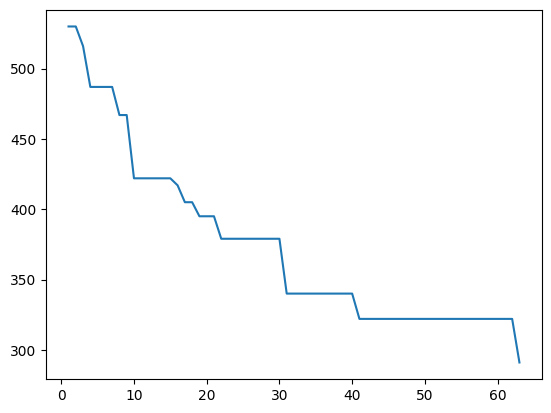

In [120]:
# the parameters look good

results = run_genetic_algorithm_for_different_parameteres(p01,parameters)
df = pd.DataFrame(results)


In [121]:
df.head(11)

,best cost,average cost,worst cost,best gen,average gen,worst gen
0,361,438.000000,531,25,80.666667,137
1,291,302.166667,328,51,76.000000,135
2,291,291.000000,291,22,54.666667,98
3,291,291.000000,291,24,39.500000,75
4,323,348.000000,388,21,69.500000,107
5,295,320.833333,348,62,107.166667,238
6,291,302.666667,327,39,67.000000,88
7,350,383.333333,415,1,12.166667,22
8,311,325.333333,337,21,40.166667,64
9,291,291.000000,291,24,36.166667,76


In [122]:
print(df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & best cost & average cost & worst cost & best gen & average gen & worst gen \\
\midrule
0 & 361 & 438.000000 & 531 & 25 & 80.666667 & 137 \\
1 & 291 & 302.166667 & 328 & 51 & 76.000000 & 135 \\
2 & 291 & 291.000000 & 291 & 22 & 54.666667 & 98 \\
3 & 291 & 291.000000 & 291 & 24 & 39.500000 & 75 \\
4 & 323 & 348.000000 & 388 & 21 & 69.500000 & 107 \\
5 & 295 & 320.833333 & 348 & 62 & 107.166667 & 238 \\
6 & 291 & 302.666667 & 327 & 39 & 67.000000 & 88 \\
7 & 350 & 383.333333 & 415 & 1 & 12.166667 & 22 \\
8 & 311 & 325.333333 & 337 & 21 & 40.166667 & 64 \\
9 & 291 & 291.000000 & 291 & 24 & 36.166667 & 76 \\
10 & 291 & 298.666667 & 321 & 19 & 30.333333 & 60 \\
\bottomrule
\end{tabular}



# Execution for Problem att48

{'population_size': 5, 'num_generations': 3000, 'mutation_rate': 0.15, 'elitism_rate': 0.15, 'selection_method': 0, 'crossover_method': 0, 'mutation_method': 0}


{'population_size': 50, 'num_generations': 3000, 'mutation_rate': 1, 'elitism_rate': 0.15, 'selection_method': 0, 'crossover_method': 1, 'mutation_method': 1}
{'population_size': 100, 'num_generations': 3000, 'mutation_rate': 0.5, 'elitism_rate': 0.15, 'selection_method': 1, 'crossover_method': 1, 'mutation_method': 1}
{'population_size': 150, 'num_generations': 3000, 'mutation_rate': 0.2, 'elitism_rate': 0.15, 'selection_method': 2, 'crossover_method': 2, 'mutation_method': 2}
{'population_size': 200, 'num_generations': 3000, 'mutation_rate': 0.15, 'elitism_rate': 0.15, 'selection_method': 3, 'crossover_method': 3, 'mutation_method': 3}
{'population_size': 200, 'num_generations': 3000, 'mutation_rate': 0.8, 'elitism_rate': 0.15, 'selection_method': 3, 'crossover_method': 3, 'mutation_method': 3}
{'population_size': 200, 'num_generations': 3000, 'mutation_rate': 0.05, 'elitism_rate': 0.15, 'selection_method': 4, 'crossover_method': 1, 'mutation_method': 3}
{'population_size': 400, 'num

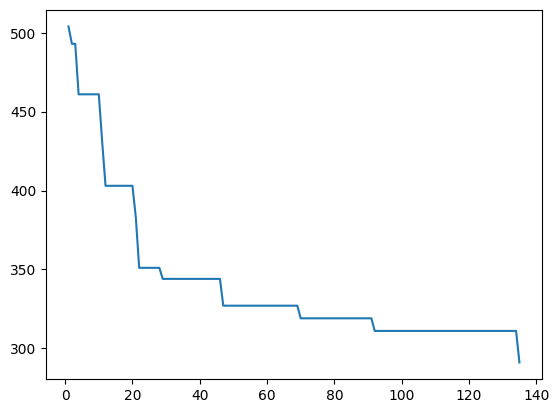

In [126]:
at48 = tsplib95.load('datasets/att48.tsp.txt')

results = run_genetic_algorithm_for_different_parameteres(p01,parameters)
df = pd.DataFrame(results)

In [ ]:
df.head(11)

In [ ]:
print(df.to_latex())